## Consuming data using Kafka (15%)

Licun Liu  
30901235  
07-02-2021

In [2]:
# Install folium
!pip install folium

In [1]:
# import statements
import folium
import pandas as pd
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt

# Connect to the kafka consumer 
def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='earliest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['127.0.0.1:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

In [14]:
topic = '2.8b_data'

# # Connect to the kafka consumer 
consumer = connect_kafka_consumer()   

# Initialize the map
m = folium.Map(location=[-37.81888,144.9661], control_scale=True, zoom_start=12)

# Create a list to store each date result
result_list = []
# Define the start date
start_date = '2020-12-01'
# Create a dictionary for each date
each_date_dic = {start_date:result_list}

# Read the data
for message in consumer:
    #  data = str(message.value.decode('utf-8')).split(',')
    
    data = str(message.value.decode('utf-8')).split(',')
    
    # Extract data from string format
    sensor_id = data[0][13:]
    date = data[1][13:-1]
    longtitude = float(data[3][12:])
    latitude = float(data[4][11:-1])
    
    # Create a new result for new date, and save it in the dictionary
    if date not in each_date_dic.keys():
        each_date_dic[start_date] = result_list
        
        # Read the result in one day
        for x in result_list:
    
            # Create Maps marker, based on the location in result list
            folium.Marker(
            location = [x["latitude"],x["longtitude"]],
            popup="Sensor ID: " + sensor_id,
            ).add_to(m)
        
        # Display the map
        print("Date: " + date)
        display(m)
        
        # Create a new map for the new date
        m = folium.Map(location=[-37.81888,144.9661], control_scale=True, zoom_start=12)
        each_date_dic[date] = []
        result_list = []
        
    # Save the data for the same day
    else:
        result_list.append({"sensor_id":sensor_id, "latitude":latitude, "longtitude":longtitude})


Date: 2020-12-08


Date: 2020-12-09


Date: 2020-12-10


Date: 2020-12-11


Date: 2020-12-12


Date: 2020-12-13


Date: 2020-12-14


Date: 2020-12-15


Date: 2020-12-16


Date: 2020-12-17


Date: 2020-12-18


Date: 2020-12-19


Date: 2020-12-20


Date: 2020-12-21


Date: 2020-12-22


Date: 2020-12-23


Date: 2020-12-24


Date: 2020-12-25


Date: 2020-12-26


Date: 2020-12-27


Date: 2020-12-28


Date: 2020-12-29


Date: 2020-12-30


Date: 2020-12-31


Date: 2020-12-02


Date: 2020-12-03


Date: 2020-12-04


Date: 2020-12-05


Date: 2020-12-06


Date: 2020-12-07


## Supplementary

Sadly to say, there are some problem with my VM, which makes it impossible to finish this task.  

Maybe you can run the code in your VM, which can get different result.

To be specific, from the Demo below, there will be 2 marker on the map with the tooltips. However, when I run the demo code in VM jupyter notebook, it only show up one marker without any tooltip.

In [4]:
### Demo
m = folium.Map(location=[45.372, -121.6972], zoom_start=12, tiles="Stamen Terrain")

tooltip = "Click me!"

folium.Marker(
    [45.3288, -121.6625], popup="<i>Mt. Hood Meadows</i>", tooltip=tooltip
).add_to(m)
folium.Marker(
    [45.3311, -121.7113], popup="<b>Timberline Lodge</b>", tooltip=tooltip
).add_to(m)

m

#### However, when I run the same code in Jupyter notebook from my computer (not VM), or other students run this code block from their VM, all good.

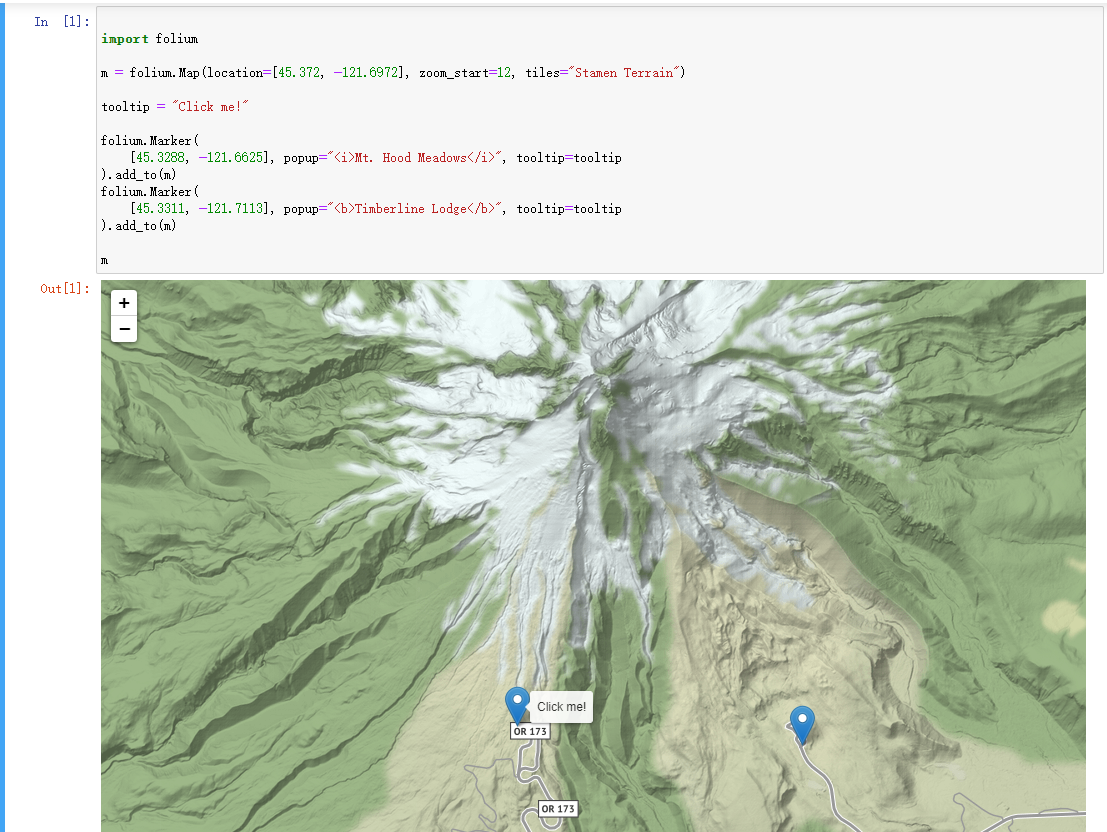

As a result, there are something wrong with my Virtual Mechine, which makes it impossible to finish this task.   

Unfortunately, I have no idea how to fix the VM error.